In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [ ]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_ys = 1
ts_ye = 22
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye, ts_ys=ts_ys, ts_ye=ts_ye)
rst_root = data_root['rst_root']
ts_root = data_root['ts_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(ts_ye+1)

In [3]:
# load dataset
f_rst = Dataset(rst_file, 'r')

In [4]:
# read grid information
lon = np.degrees(f_rst.variables['lonCell'][:])
lat = np.degrees(f_rst.variables['latCell'][:])
cellArea = f_rst.variables['areaCell'][:]

refBottomDepth = f_rst.variables['refBottomDepth'][:]
nVertLevels = len(refBottomDepth)
refTopDepth = np.zeros(nVertLevels)
refTopDepth[1:nVertLevels] = refBottomDepth[0:nVertLevels-1]
refLayerThickness = refTopDepth-refBottomDepth
refMidDepth = 0.5*(refTopDepth+refBottomDepth)


### Bathymetry

Plotting map of Bottom Depth (m) at region 'LabSea'


/Users/qingli/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'tri'
  s)


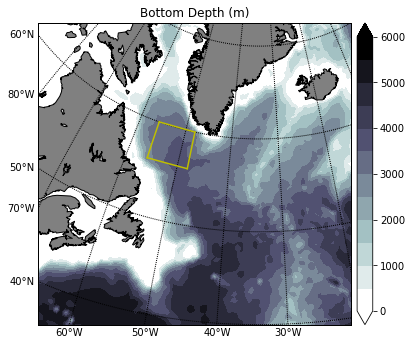

In [5]:
fig = plt.figure(figsize=[6,6])
levels = np.linspace(0, 6000, 13)
bottomDepth = f_rst.variables['bottomDepth'][:]
mpaso_bath = MPASOMap(data=bottomDepth, lat=lat, lon=lon, cellarea=cellArea, name='Bottom Depth', units='m')
m = mpaso_bath.plot(region='LabSea', ptype='contourf', cmap='bone_r', levels=levels)
robj = region_latlon('LabSea_SD1')
m.drawgreatcircle(robj.lon_ll, robj.lat_ll, robj.lon_ll, robj.lat_ur, color='y')
m.drawgreatcircle(robj.lon_ll, robj.lat_ur, robj.lon_ur, robj.lat_ur, color='y')
m.drawgreatcircle(robj.lon_ur, robj.lat_ur, robj.lon_ur, robj.lat_ll, color='y')
m.drawgreatcircle(robj.lon_ur, robj.lat_ll, robj.lon_ll, robj.lat_ll, color='y')

# figname = fig_root+'/LabSea_bathymetry.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)

### Mixed Layer Depth (m)

In [6]:
grpname = 'mixedLayerDepth'
region = 'LabSea_SD1'
varlist = ['timeMonthly_avg_dThreshMLD',
           'timeMonthly_avg_tThreshMLD']
nvar = len(varlist)
for j, varname in enumerate(varlist):
    ts_file = ts_root+'/{:s}/{:s}_{:04d}01_{:04d}12.nc'.format(grpname, varname, ts_ys, ts_ye)
    f_ts = Dataset(ts_file, 'r')
    ncvar = f_ts.variables[varname]
    data = ncvar[:]
    if j == 0:
        nt = data.shape[0]
        time = np.linspace(1,nt,nt)/12.
        mdata = np.zeros([nvar, nt])
    for i in np.arange(nt):
        mpaso_obj = MPASOMap(data=data[i,:], lat=lat, lon=lon, cellarea=cellArea, name=varname, units=ncvar.units)
        mdata[j, i] = mpaso_obj.mean(region=region)

print(mdata.shape)

(2, 300)


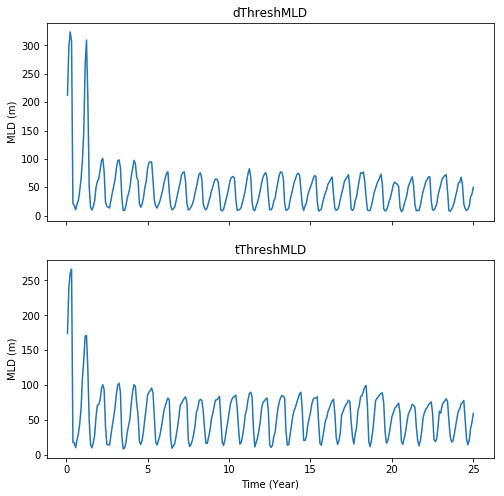

In [7]:
fig, axarr = plt.subplots(nvar, sharex='col')
fig.set_size_inches(8, 8)
for i in np.arange(nvar):
    axarr[i].plot(time, mdata[i, :])
    axarr[i].set_title(varlist[i][16:])
    axarr[i].set_ylabel('MLD (m)')
    if i == nvar-1:
        axarr[i].set_xlabel('Time (Year)')

# plt.show()
# figname = fig_root+'/LabSea_ts_MLD.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)

### Heat Flux (W m$^{-2}$)

In [8]:
grpname = 'heatFlux'
region = 'LabSea_SD1'
varlist = ['timeMonthly_avg_sensibleHeatFlux',
           'timeMonthly_avg_latentHeatFlux',
           'timeMonthly_avg_shortWaveHeatFlux',
           'timeMonthly_avg_longWaveHeatFluxDown',
           'timeMonthly_avg_longWaveHeatFluxUp']
nvar = len(varlist)
for j, varname in enumerate(varlist):
    ts_file = ts_root+'/{:s}/{:s}_{:04d}01_{:04d}12.nc'.format(grpname, varname, ts_ys, ts_ye)
    f_ts = Dataset(ts_file, 'r')
    ncvar = f_ts.variables[varname]
    data = ncvar[:]
    if j == 0:
        nt = data.shape[0]
        time = np.linspace(1,nt,nt)/12.
        mdata = np.zeros([nvar, nt])
    for i in np.arange(nt):
        mpaso_obj = MPASOMap(data=data[i,:], lat=lat, lon=lon, cellarea=cellArea, name=varname, units=ncvar.units)
        mdata[j, i] = mpaso_obj.mean(region=region)

print(mdata.shape)

(5, 300)


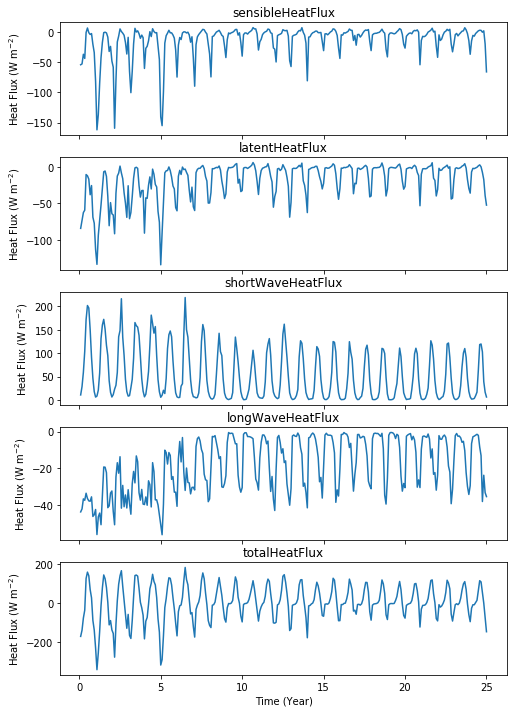

In [9]:
fig, axarr = plt.subplots(5, sharex='col')
fig.set_size_inches(8, 12)
for i in np.arange(5):
    if i < 3:
        axarr[i].plot(time, mdata[i, :])
        axarr[i].set_title(varlist[i][16:])
    elif i == 3:
        axarr[i].plot(time, np.sum(mdata[3:5, :], axis=0))
        axarr[i].set_title('longWaveHeatFlux')
    else:
        axarr[i].plot(time, np.sum(mdata, axis=0))
        axarr[i].set_title('totalHeatFlux')
    axarr[i].set_ylabel('Heat Flux (W m$^{-2}$)')
    if i == nvar-1:
        axarr[i].set_xlabel('Time (Year)')


# plt.show()
# figname = fig_root+'/LabSea_ts_heatFlux.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)

### Fresh Water Flux (kg m$^{-2}$ s$^{-1}$)

In [10]:
grpname = 'freshWaterFlux'
region = 'LabSea_SD1'
varlist = ['timeMonthly_avg_evaporationFlux',
           'timeMonthly_avg_rainFlux',
           'timeMonthly_avg_snowFlux',
           'timeMonthly_avg_seaIceSalinityFlux',
           'timeMonthly_avg_seaIceFreshWaterFlux',
           'timeMonthly_avg_riverRunoffFlux',
           'timeMonthly_avg_iceRunoffFlux']
nvar = len(varlist)
for j, varname in enumerate(varlist):
    ts_file = ts_root+'/{:s}/{:s}_{:04d}01_{:04d}12.nc'.format(grpname, varname, ts_ys, ts_ye)
    f_ts = Dataset(ts_file, 'r')
    ncvar = f_ts.variables[varname]
    data = ncvar[:]
    if j == 0:
        nt = data.shape[0]
        time = np.linspace(1,nt,nt)/12.
        mdata = np.zeros([nvar, nt])
    for i in np.arange(nt):
        mpaso_obj = MPASOMap(data=data[i,:], lat=lat, lon=lon, cellarea=cellArea, name=varname, units=ncvar.units)
        mdata[j, i] = mpaso_obj.mean(region=region)

print(mdata.shape)

(7, 300)


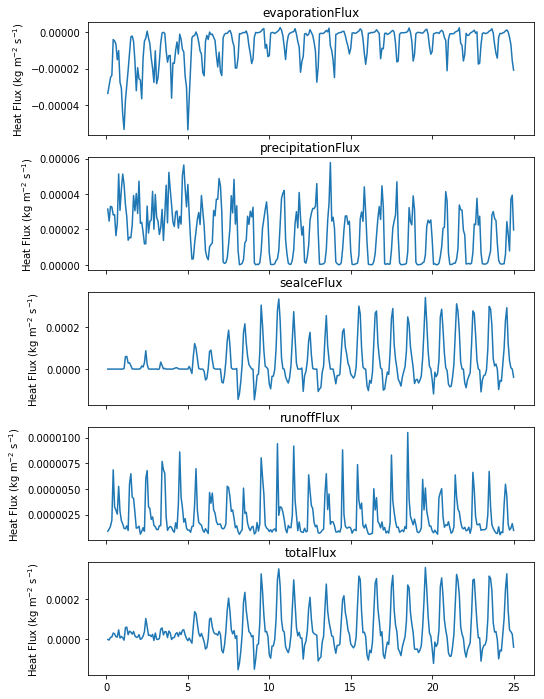

In [11]:
fig, axarr = plt.subplots(5, sharex='col')
fig.set_size_inches(8, 12)
for i in np.arange(5):
    if i == 0:
        axarr[i].plot(time, mdata[i, :])
        axarr[i].set_title(varlist[0][16:])
    elif i == 1:
        axarr[i].plot(time, np.sum(mdata[1:3, :], axis=0))
        axarr[i].set_title('precipitationFlux')
    elif i == 2:
        axarr[i].plot(time, np.sum(mdata[3:5, :], axis=0))
        axarr[i].set_title('seaIceFlux')
    elif i == 3:
        axarr[i].plot(time, np.sum(mdata[5:7, :], axis=0))
        axarr[i].set_title('runoffFlux')
    else:
        axarr[i].plot(time, np.sum(mdata,axis=0))
        axarr[i].set_title('totalFlux')
    axarr[i].set_ylabel('Heat Flux (kg m$^{-2}$ s$^{-1}$)')
    if i == nvar-1:
        axarr[i].set_xlabel('Time (Year)')

# plt.show()
# figname = fig_root+'/LabSea_ts_heatFlux.png'
# fig.savefig(figname, dpi = 300)
# plt.close(fig)